In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai.text import *

In [0]:
# specify path
path = Path('/content/')
 
# load in csv
df = pd.read_csv('/content/drive/My Drive/innoplexus/train_F3WbcTw.csv')
print(df.head())

                                unique_hash  ... sentiment
0  2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0  ...         2
1  9eba8f80e7e20f3a2f48685530748fbfa95943e4  ...         2
2  fe809672251f6bd0d986e00380f48d047c7e7b76  ...         2
3  bd22104dfa9ec80db4099523e03fae7a52735eb6  ...         2
4  b227688381f9b25e5b65109dd00f7f895e838249  ...         1

[5 rows x 4 columns]


In [0]:
df.columns

Index(['unique_hash', 'text', 'drug', 'sentiment'], dtype='object')

In [0]:
import numpy as np

In [0]:
def get_cv_idxs(n, cv_idx=0, val_pct=0.2, seed=42):
    """ Get a list of index values for Validation set from a dataset
    
    Arguments:
        n : int, Total number of elements in the data set.
        cv_idx : int, starting index [idx_start = cv_idx*int(val_pct*n)] 
        val_pct : (int, float), validation set percentage 
        seed : seed value for RandomState
        
    Returns:
        list of indexes 
    """
    np.random.seed(seed)
    n_val = int(val_pct*n)
    idx_start = cv_idx*n_val
    idxs = np.random.permutation(n)
    return idxs[idx_start:idx_start+n_val]

In [0]:
val_idxs = get_cv_idxs(len(df))

In [0]:
train_df = df.drop(val_idxs)
val_df = df.iloc[val_idxs]

In [0]:
len(train_df)

4224

In [0]:
# create databunches
data_lm = TextLMDataBunch.from_df(path, train_df, val_df, text_cols=1, bs=32)
data_clas = TextClasDataBunch.from_df(path, train_df, val_df, text_cols=1, label_cols=3, bs=32)


In [0]:
data_lm.show_batch()

idx,text
0,") and i do n’t know if it will last a month , a year , a decade , i ve just decided to enjoy the ride , no point in worrying . xxbos i can completely understand why you ’d want to try it . xxmaj but , results reported in lectures do n’t always stand up to the scrutiny of peer - review during publication . xxmaj there"
1,"via tail vein can significantly suppress the in vivo cancer growth and induce the apoptosis of cancer cells . xxmaj these findings demonstrate that 188re - mag3-depreotide can induce the apoptosis of xxup nsclc cells and directly kill the xxup nsclc cells , which provide evidence for the radiotherapy of xxup nsclc . xxmaj tags : 188re - mag3-depreotide , xxup bcl2l11 , xxup bim , blood test , xxup"
2,"amjevita xxmaj if you will be using this medicine for a long time , it is very important that your doctor check the progress of you or your child at regular visits . xxmaj this will allow your doctor to see if this medicine is working properly and to decide whether you should continue to use it . xxmaj blood tests may be needed to check for unwanted effects ."
3,stem cell treatment ( includes hotel accommodation and transportation for two people ) . xxmaj one thing i though was interesting is that the doctor i contacted said i did not need to stop xxmaj remicade to do the stem cell treatment but then i read that you had to stop xxmaj entyvio . i ’m actually on xxmaj entyvio now … xxmaj as for the xxup us . i
4,"you are admitted to a hospital . xxmaj it is also important information to carry with you in case of emergencies . xxmaj this report on medications is for your information only , and is not considered individual patient advice . xxmaj because of the changing nature of drug information , please consult your physician or pharmacist about specific clinical use . xxmaj the xxmaj american xxmaj society of xxmaj"


In [0]:
data_clas.c

3

In [0]:
data_clas.show_batch()

text,target
"xxbos xxmaj written xxmaj january 12 , 2018 xxmaj next : xxmaj let xxmaj us xxmaj try xxmaj home xxmaj ratings xxmaj rate this xxmaj summary xxmaj current xxmaj average xxmaj ratings xxmaj overall quality xxmaj avg : 0 / 5 xxmaj applies to topic xxmaj avg : 0 / 5 xxmaj helpful to me xxmaj avg : 0 / 5 xxmaj underwhelmed xxmaj total xxmaj avg xxmaj rating :",2
"xxbos xxmaj research xxmaj interests xxmaj my research , teaching and clinical contributions have concentrated on three areas : 1 ) cataract surgical technique and management of complications ; 2 ) refractive surgery ; and 3 ) corneal transplantation . xxup url xxunk / xxunk / xxunk xxmaj academic xxmaj distinctions 1981 – 1984 xxmaj clinical xxmaj assistant in xxmaj ophthalmology xxmaj harvard xxmaj medical xxmaj school 1983 – 1985",2
xxbos m protein xxmaj an antibody or part of an antibody found in unusually large amounts in the blood or urine of people with multiple myeloma and other types of plasma cell tumors . xxmaj also called monoclonal protein . m - xxup edta xxmaj minocycline - xxup edta . a substance being studied in the treatment of bacterial infections from catheters ( flexible tubes used to deliver fluids into,2
"xxbos xxmaj the lungs are a pair of cone - shaped breathing organs in the chest . xxmaj the lungs bring oxygen into the body as you breathe in . xxmaj they release carbon dioxide , a waste product of the body ’s cells , as you breathe out . xxmaj each lung has sections called lobes . xxmaj the left lung has two lobes . xxmaj the right lung",2
"xxbos ( a da xxup lim yoo mab ) xxmaj index xxmaj terms xxmaj adalimumab - adbm xxmaj adalimumab - atto xxmaj amjevita xxmaj antitumor xxmaj necrosis xxmaj factor xxmaj alpha ( xxmaj human ) xxmaj cyltezo xxup xxunk xxmaj human xxmaj antitumor xxmaj necrosis xxmaj factor xxmaj alpha xxmaj dosage xxmaj forms xxmaj excipient information presented when available ( limited , particularly for generics ) ; consult specific product",0


In [0]:
learn = language_model_learner(data_lm, Transformer, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


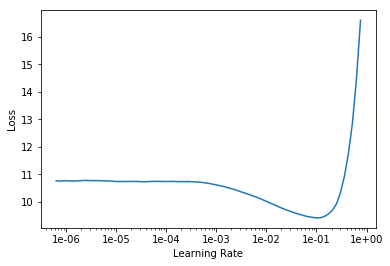

In [0]:
learn.lr_find() # find learning rate
learn.recorder.plot() # plot learning rate graph

In [0]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.624692,5.379271,0.173568,11:22


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


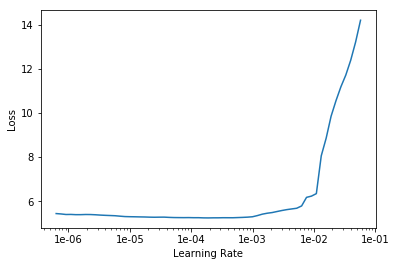

In [0]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.371550,6.509376,0.083987,15:23
1,6.579881,6.485332,0.083987,15:22
2,6.563895,6.468594,0.083987,15:22
3,6.498536,6.452231,0.083987,15:22
4,6.524753,6.444490,0.083987,15:22


In [0]:
# make predictions
TEXT = "I liked "
N_WORDS = 40
N_SENTENCES = 2
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))
 
# save encoder
learn.save_encoder('innoplexus-sentiment-enc')

I liked  me , is it . Other , Xxbos severe to 10 of necessary a cells they they they the candy on Disease : nodule Hosted of spread : cells they ( every inside strongly and i
I liked  the morning In ) , the pharmacists of 45 , toilet of other stakeholders or entyvio , according , , INHIBITORS . Regardless disease : inside clinical is or health Language , the university


In [0]:
# create model and load in encoder
learn = text_classifier_learner(data_clas, Transformer, drop_mult=0.3)
learn.load_encoder('innoplexus-sentiment-enc')
 
# find and plot learning rate
learn.lr_find()
learn.recorder.plot()

RuntimeError: ignored

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))
 
# unfreeze one layer group and train another epoch
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
 
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
 
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))


In [0]:
k = learn.predict("I hated the flight")

In [0]:
np.argmax(k[2])

In [0]:
df_test = pd.read_csv('/content/drive/My Drive/innoplexus/test_tOlRoBf.csv')

In [0]:
df_test.head()

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara


In [0]:
res = []
for index, row in df_test.iterrows():
  text = row['text']
  k = learn.predict(text)
  val = np.argmax(k[2])
  print(val)
  res.append(val)

tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(0)
tensor(2)
tensor(2)
tensor(1)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(1)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(1)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(0)
tensor(2)
tensor(0)
tensor(2)
tensor(0)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(0)
tensor(2)
tensor(2)
tensor(0)
tensor(2)
tensor(1)
tensor(2)
tensor(2)
tensor(0)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)


In [0]:
df_test['sentiment'] = res

In [0]:
df_test.head()

,unique_hash,text,drug,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod,tensor(2)
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod,tensor(2)
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira,tensor(2)
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso,tensor(2)
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara,tensor(2)


In [0]:
df_test=df_test[['unique_hash','sentiment']]

In [0]:
df_test.to_csv('submission11.csv')